In this I am going to use the column transformer from scikit learn. For column wise normalization of the Iris dataset. 
What we want to do here:
--> Find mean of the column. 
--> Doing normalization and standardization on whole dataset at once. --> Using numpy or scikit learn. 
--> Find the similarity matrix (co-variance) --> Using numpy or scikit learn. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
iris: pd.DataFrame = pd.read_csv('../../Downloads/Data for ML/iris.csv')
print(iris.head(3))
labels = iris['variety'].values

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa


Not only mean, you can calculate anything here like variance, standard deviation, median, percentile, quantile etc.

In [3]:
pl: np.ndarray = iris.iloc[:, 2].values
print(f'Mean of Petal length = {pl.mean():.4f}')
sl: np.ndarray = iris.iloc[:, 0].values
print(f'Mean of Sepal length = {sl.mean():.4f}')

Mean of Petal length = 3.7580
Mean of Sepal length = 5.8433


In [4]:
X = iris.iloc[:, :-1].values
scaler = StandardScaler().fit(X)
print(f'Mean and Standard Deviation of iris data set = {scaler.mean_.round(4)} and {scaler.scale_.round(4)}')
scaler_transform = scaler.transform(X)

# If I want to fit some new data in the above transform.
data = [[1, 1, 1, 1]]                          # --> It will calculate the standard values of this data using mean and variance of above data. eg (1 - 1.1993)/0.7597 = -0.262386.
data_transformed = scaler.transform(data)
print(data_transformed)

Mean and Standard Deviation of iris data set = [5.8433 3.0573 3.758  1.1993] and [0.8253 0.4344 1.7594 0.7597]
[[-5.86856386 -4.7359148  -1.56757623 -0.26238682]]


Using fit_transform directly. 

In [5]:
X = iris.iloc[:, :-1].values
scaler = StandardScaler().fit_transform(X)
if scaler_transform.all() == scaler.all():
    print(f'Yes')
else: print('No')

Yes


Covariance: --> If the data is standardized then multiplication of the matrix and it's transpose will be the covariance or the similarity matrix. 

Covariance matrix can be biased and Unbiased estimator. Numpy by default uses unbiased estimator. 

In [6]:
X = iris.iloc[:, :-1].values
scaler = StandardScaler().fit_transform(X)

X_cov = np.matmul(scaler.T,scaler)/(scaler.shape[0] - 1) 
print(X_cov)
print(np.cov(scaler.T))                           # --> .cov method for directly calculating the covariance. 

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


Principal component analysis(PCA). 

--> Using eigen value and eigen vector. 
--> Using sklearn. 

<Axes: >

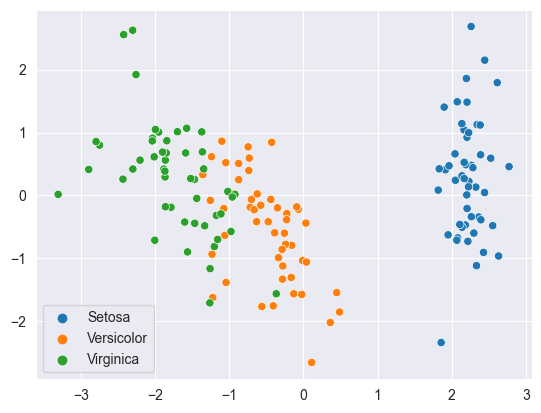

In [7]:
eigvals, eigvecs = np.linalg.eigh(X_cov)
order_of_importance = np.argsort(eigvals)[::-1]

sorted_eigvals = eigvals[order_of_importance]
sorted_eigvecs = eigvecs[:,order_of_importance]

k = 2                                                            # Select the number of principal component.
reduced_data = np.matmul(scaler, sorted_eigvecs[ : , : k])       # Calculating projection of data points on the eigenvector(rotated vector). 
PC1 = reduced_data[:,0]
PC2 = reduced_data[:,1]

#df = pd.DataFrame({'PC1': PC1, 'PC2': PC2, 'label': labels})
# If you want to plot PC1, and PC2 based on labels. You can map 'labels' to a list of colors or use a library like seaborn, which has built-in support for this functionality.
sns.scatterplot(x=PC1, y=PC2, hue=labels)

Using sklearn. 

<Axes: >

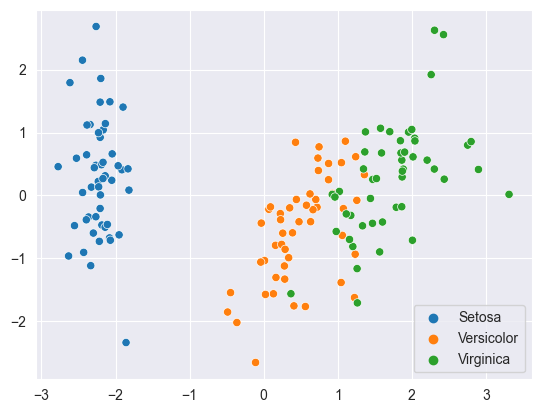

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaler)              # It requires the standardized data.
 
PC1 = reduced_data[:,0]
PC2 = reduced_data[:,1]
sns.scatterplot(x=PC1, y=PC2, hue=labels)

Explained variance: The eigenvalues measure the importance of each principal component. To convert them to explained variance, which refers to how much the principal component explains the variation in the data, we take the eigenvalues and divide them by the sum of all the eigenvalues.
To check how PCA worked, we calculate the total explained variance by using k principal components. This involves summing their explained variance.

Using NumPy.

Text(0, 0.5, 'Total explained variance')

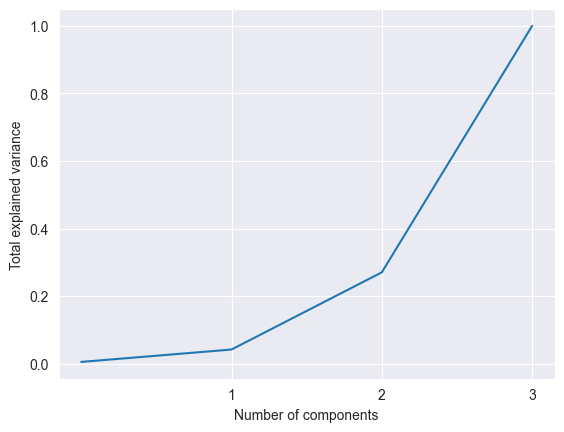

In [9]:
eigenvalues_ratio = eigvals/np.sum(eigvals)
eigenvalues_cumsum = np.cumsum(eigenvalues_ratio)
plt.plot(eigenvalues_cumsum)
plt.xticks(np.arange(1, len(eigvals),1))
plt.xlabel("Number of components")
plt.ylabel("Total explained variance")

Using sklearn. 

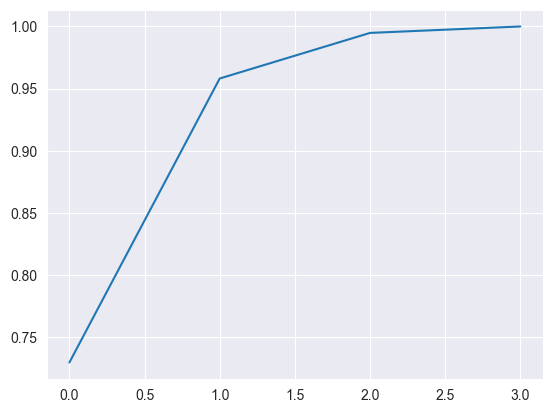

In [15]:
pca = PCA(n_components=4)                                              # You can set n_components to 0.99 to save 99% of your variance while eliminating the dimensions.
reduced_data = pca.fit_transform(scaler)
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance_ratio)
plt.plot(explained_variance_cumsum)                                    # In the plot we can see, we want only 3 dimensions to save 100% variance.
#plt.xticks(np.arange(0,3.5,1))

--> Below we can visualize the explained variance: Only 'Petal length', 'Petal width', and 'sepal length' are enough to cover the whole dataset range from 0.1 to 7.9.
--> We don't need the 'Sepal width'. Other combinations are also possible like (sl,sw, and pw).

In [11]:
print(f"Sepal length range from {min(iris['sepal.length'].values)} to {max(iris['sepal.length'].values)}")
print(f"Sepal width range from {min(iris['sepal.width'].values)} to {max(iris['sepal.width'].values)}")
print(f"Petal length range from {min(iris['petal.length'].values)} to {max(iris['petal.length'].values)}")
print(f"Petal width range from {min(iris['petal.width'].values)} to {max(iris['petal.width'].values)}")

Sepal length range from 4.3 to 7.9
Sepal width range from 2.0 to 4.4
Petal length range from 1.0 to 6.9
Petal width range from 0.1 to 2.5


t-sne. --> Two hyperparameter perplexity and the number of iterations. 

<Axes: >

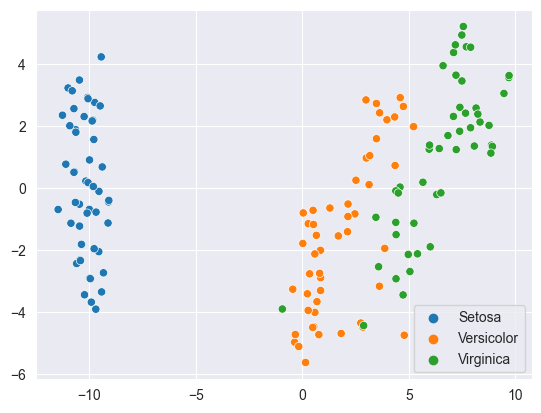

In [37]:
from sklearn.manifold import TSNE
data = iris.iloc[:,:-1].values
scaler_data = StandardScaler().fit_transform(data)
labels = iris.iloc[:,-1].values
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(scaler_data)
tsne_1 = tsne_result[:,0]
tsne_2 = tsne_result[:,1]
sns.scatterplot(x=tsne_1, y=tsne_2, hue=labels)